In [1]:
import cv2
import tensorflow as tf
import numpy as np
import scipy.io
import matplotlib.pyplot as plt


In [21]:
from tensorflow.keras.models import save_model

In [2]:
emnist_dir = '/Users/pushpakumar/Downloads/emnist'
emnist_data = scipy.io.loadmat('emnist-byclass.mat')

In [3]:
x_train = emnist_data['dataset']['train'][0, 0]['images'][0, 0]
y_train = emnist_data['dataset']['train'][0, 0]['labels'][0, 0]
x_test = emnist_data['dataset']['test'][0, 0]['images'][0, 0]
y_test = emnist_data['dataset']['test'][0, 0]['labels'][0, 0]

In [4]:
x_train_ini = x_train.reshape(-1,28 , 28, 1)
x_test_ini = x_test.reshape(-1, 28, 28, 1)

In [5]:
x_train = np.array([np.fliplr(np.rot90(img, k=3)) for img in x_train_ini])
x_test = np.array([np.fliplr(np.rot90(img, k=3)) for img in x_test_ini])

In [6]:
print(x_train.shape)

(697932, 28, 28, 1)


In [7]:
x_train=x_train/255.0
x_test=x_test/255.0

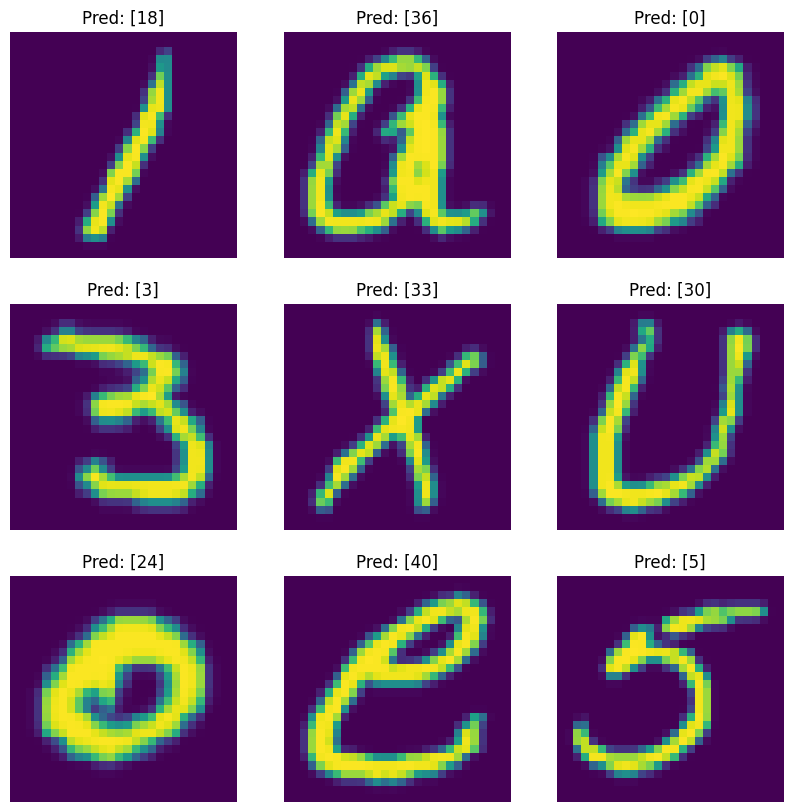

In [8]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i]/255.0)
    plt.title(f'Pred: {y_test[i]}')
    plt.axis("off")
    

In [9]:
no_classes=len(np.unique(y_train))
print(no_classes)

62


In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),
    
    tf.keras.layers.Conv2D(15, (2, 2), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(45, (2, 2), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(90, (2, 2), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(450,activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(225,activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(120,activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.1), 
    tf.keras.layers.Dense(no_classes, activation='softmax',kernel_initializer = 'he_uniform')   
])

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 15)     │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 27, 27, 15)     │            60 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 15)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 45)     │         2,745 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 45)     │           180 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 45)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 45)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 90)       │        16,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 5, 90)       │           360 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 90)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 90)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 360)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 450)            │       162,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 450)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 225)            │       101,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 225)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │        27,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 62)             │         7,502 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,257 (1.21 MB)

 Trainable params: 317,957 (1.21 MB)

 Non-trainable params: 300 (1.17 KB)

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
batch_size=128
epochs=15
history= model.fit(x_train, y_train,  batch_size,epochs,validation_data=(x_test,y_test))

Epoch 1/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 498s 89ms/step - accuracy: 0.5956 - loss: 1.4684 - val_accuracy: 0.8152 - val_loss: 0.5306
Epoch 2/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 444s 81ms/step - accuracy: 0.7914 - loss: 0.6297 - val_accuracy: 0.8336 - val_loss: 0.4668
Epoch 3/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 467s 86ms/step - accuracy: 0.8064 - loss: 0.5735 - val_accuracy: 0.8347 - val_loss: 0.4580
Epoch 4/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 539s 99ms/step - accuracy: 0.8140 - loss: 0.5473 - val_accuracy: 0.8427 - val_loss: 0.4386
Epoch 5/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 708s 130ms/step - accuracy: 0.8193 - loss: 0.5270 - val_accuracy: 0.8440 - val_loss: 0.4330
Epoch 6/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 596s 109ms/step - accuracy: 0.8225 - loss: 0.5125 - val_accuracy: 0.8404 - val_loss: 0.4398
Epoch 7/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 423s 78ms/step - accuracy: 0.8257 - loss: 0.5016 - val_accuracy: 0.8382 - val_loss: 0.4471
Epoch 8/15
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 428s 78ms/step - accuracy

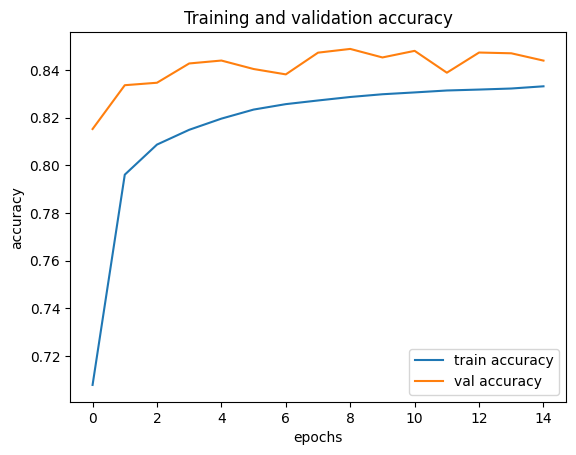

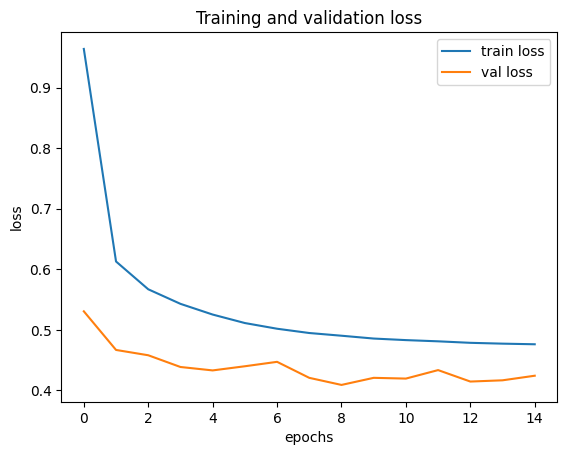

In [15]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs   = range(len(acc))

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')
plt.show()

In [16]:
(loss,accuracy)=model.evaluate(x_test,y_test,batch_size,verbose=1)
print(accuracy*100)

909/909 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8445 - loss: 0.4258
84.3943178653717


In [17]:
predict=model.predict(x_test)

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step


In [18]:
predicted_labels = np.argmax(predict, axis=1)

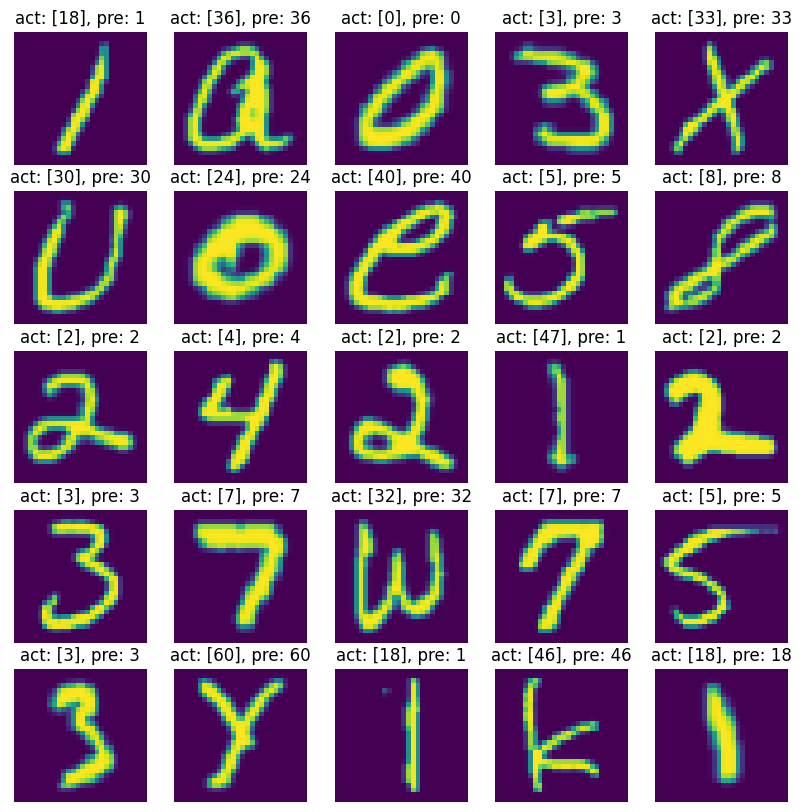

In [19]:
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i]/255.0)
    plt.title(f'act: {y_test[i]}, pre: {predicted_labels[i]}')
    plt.axis("off")

In [22]:
filepath = 'model2_saved.h5'
save_model(model, filepath)